In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import Ridge
from sklearn import linear_model
warnings.filterwarnings('ignore')

In [15]:
# Reading the user file
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

users = pd.read_csv('u.user', sep='|', names=u_cols)
n_users = users.shape[0]

n_users

users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [61]:
# Reading rating file
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('u1.base', sep='\t', names=r_cols)
ratings_test = pd.read_csv('u1.test', sep = '\t', names=r_cols)

rate_train = ratings_base.values
rate_test = ratings_test.values

print("The number of rating in train: ", rate_train.shape[0])
print("The number of rating in test: ", rate_test.shape[0])

The number of rating in train:  80000
The number of rating in test:  20000


In [52]:
# Reading items file
i_cols = ['movie id', 'movie title' ,'release date','video release date',
          'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
          'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
          'Thriller', 'War', 'Western']

# Specify the encoding as 'latin1' or 'ISO-8859-1'
items = pd.read_csv('u.item', sep='|', names=i_cols, encoding='latin1')

X0 = items.values
X = X0[:, -19:]

print('Number of items:', X.shape[0])
items.head()

Number of items: 1682


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
rating_train[1:4]

array([[        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       [        1,         4,         3, 876893119]])

In [19]:
# # Finding the movies that the user have rated and the value of each rating
# def get_items_rated_by_user(rate_matrix, user_id):
#     y = rate_matrix[:,0]
#     # Mình cần phải cộng thêm 1 cho user_id vì trong rate_matrix, id bắt đầu từ 1 nhưng trong Python thì id sẽ bắt đầu từ 0
#     ids = np.where(y == user_id + 1)[0]
#     item_ids = rate_matrix[ids, 1] - 1 # Index bắt đầu từ 0
#     scores = rate_matrix[ids, 2]

#     return (item_ids, scores)

In [20]:
# # Bây giờ ta sẽ đi tìm vector trọng số của người dùng
# d = X.shape[1]  # Chiều dữ liệu
# W = np.zeros((d, n_users))
# b = np.zeros(n_users)

# for n in range(n_users):
#     ids, scores = get_items_rated_by_user(rating_train, n)
#     model = Ridge(alpha =0.01, fit_intercept = True)
#     Xhat = X[ids, :]
#     models.fir(Xhat, score)
#     W[:, n] = model.coef_

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

consine_similarity_mat = cosine_similarity(n_items)
similarity_df = pd.DataFrame(consine_similarity_mat)
similarity_df



,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000
1,0.000000,1.000000,0.577350,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.816497,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.00000,0.000000
2,0.000000,0.577350,1.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.00000,0.000000
3,0.333333,0.333333,0.000000,1.000000,0.333333,0.577350,0.408248,0.666667,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.000000,0.408248,0.57735,0.577350
4,0.000000,0.333333,0.577350,0.333333,1.000000,0.577350,0.408248,0.333333,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.408248,0.408248,0.00000,0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.000000,0.000000,0.000000,0.577350,0.577350,1.000000,0.707107,0.577350,1.000000,0.707107,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.707107,0.00000,1.000000
1678,0.000000,0.408248,0.707107,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.00000,0.000000
1679,0.000000,0.000000,0.000000,0.408248,0.408248,0.707107,0.500000,0.408248,0.707107,0.500000,...,0.000000,0.707107,0.707107,0.707107,0.707107,0.707107,0.500000,1.000000,0.00000,0.707107
1680,0.577350,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000


In [32]:
def get_top_n_recommendations(user_id, train_data, similarity_df, threshold, top_n=10):
    user_movies = (train_data[(train_data['user_id'] == user_id) & (train_data['rating'] >= threshold)]['movie_id'] - 1).tolist()

    all_movies = similarity_df.index
    unseen_movies = all_movies.difference(user_movies)

    scores = similarity_df.loc[unseen_movies, user_movies].mean(axis=1)
    top_n_movies = scores.nlargest(top_n)

    return top_n_movies.index

In [37]:
get_top_n_recommendations(1, rating_base, similarity_df, 5)

Index([169, 511, 516, 691, 730, 774, 777, 935, 1099, 1114], dtype='int64')

In [80]:
recommendations = {}
for user_id in rating_base['user_id'].unique():
    recommendations[user_id] = get_top_n_recommendations(user_id, rating_base, similarity_df, 5)

In [81]:
ground_truth = ratings_test.groupby('user_id').apply(lambda x: x[x['rating'] >= 5]['movie_id'].tolist()).to_dict()

In [82]:
def compute_hr_at_k(recommendations, ground_truth, k=10):
    hit = 0
    total_users = len(ground_truth)

    for user_id, true_items in ground_truth.items():
        predicted_items = recommendations.get(user_id, [])
        # print(set(predicted_items))
        if set(true_items).intersection(set(predicted_items)):
            hit += 1

    hr_at_k = hit / total_users

    return hr_at_k

In [83]:
threshold_list = []
hr_at_k_list = []

In [84]:
def compute_hr_at_k_with_threshold_t(threshold):
    recommendations = {}
    for user_id in ratings_test['user_id'].unique():
        recommendations[user_id] = get_top_n_recommendations(user_id, ratings_base, similarity_df, threshold)

    hr_at_k = compute_hr_at_k(recommendations, ground_truth)
    threshold_list.append(threshold)
    hr_at_k_list.append(hr_at_k)
    return hr_at_k

In [85]:
compute_hr_at_k_with_threshold_t(5)

0.11764705882352941

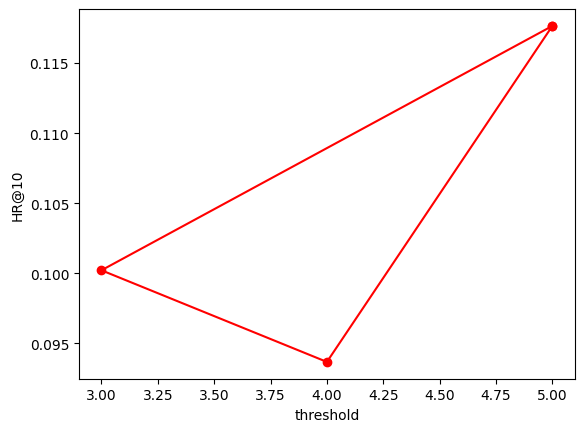

In [86]:
for threshold in range(3, 6):
    compute_hr_at_k_with_threshold_t(threshold)

plt.plot(threshold_list, hr_at_k_list, 'r-o')
plt.xlabel("threshold")
plt.ylabel("HR@10")
plt.show()

In [88]:
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(r / np.log2(np.arange(2, r.size + 2)))
    return 0.

def ndcg_at_k(r, k):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k) / dcg_max

def compute_ndcg_at_k(recommendations, ground_truth, k=10):
    ndcg_scores = []
    for user_id, true_items in ground_truth.items():
      predicted_items = recommendations.get(user_id, [])
      relevance = [1 if item in true_items else 0 for item in predicted_items[:k]]
      ndcg_scores.append(ndcg_at_k(relevance,k))
    return np.mean(ndcg_scores)

In [89]:
threshold_list = []
ndcg_at_k_list = []

In [90]:
def compute_ndcg_at_k_with_threshold_t(threshold):
    recommendations = {}
    for user_id in ratings_test['user_id'].unique():
        recommendations[user_id] = get_top_n_recommendations(user_id, ratings_base, similarity_df, threshold)

    ndcg_at_k = compute_ndcg_at_k(recommendations, ground_truth)
    threshold_list.append(threshold)
    ndcg_at_k_list.append(ndcg_at_k)
    return ndcg_at_k

In [91]:
compute_ndcg_at_k_with_threshold_t(5)

0.05735843520352362

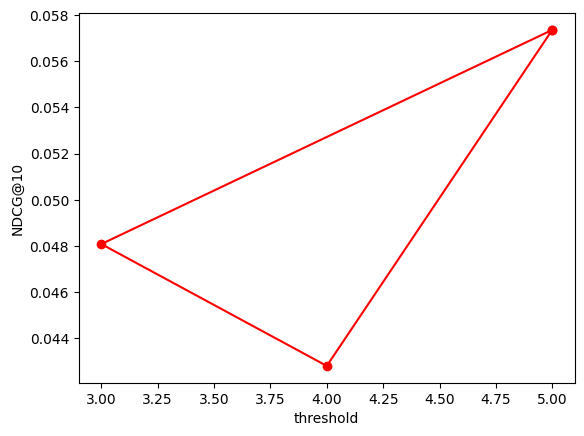

In [92]:
for threshold in range(3, 6):
    compute_ndcg_at_k_with_threshold_t(threshold)

plt.plot(threshold_list, ndcg_at_k_list, 'r-o')
plt.xlabel("threshold")
plt.ylabel("NDCG@10")
plt.show()